In [1]:
#initialization
import numpy as np



from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit , execute
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()


# import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit ovject to return
    # This circuit has n+1 qubits: the size of the input
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the casse in which the oracle is balanced
    if case == "balanced":
        # We apply controlled-Not gates for each qubit, using the 
        # output qubit as the target
        for qubit in range(n):
            oracle_qc.cx(qubit,n)
            
    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of hte oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
            
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display circuit
    return oracle_gate

In [3]:
def dj_algorithm(n, case = 'random'):
    dj_circuit = QuantumCircuit(n + 1, n)
    # Set up the input register:
    for qubit in range(n):
        dj_circuit.h(qubit)
    # And set up the output qubit:
    dj_circuit.x(n)
    dj_circuit.h(n)
    # Let's append the oracle gate to our circuit:
    if case == 'random':
        random = np.random.randint(2)
        if random ==0:
            case = 'constant'
        else:
            case = 'balanced'
    oracle = dj_oracle(case, n)
    dj_circuit.append(oracle, range(n+1))
    # Finally preform the H-Gates again and measure 
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i,i)
    return dj_circuit

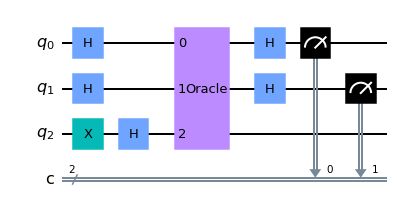

In [4]:
n = 2
dj_circuit = dj_algorithm(n)
dj_circuit.draw()

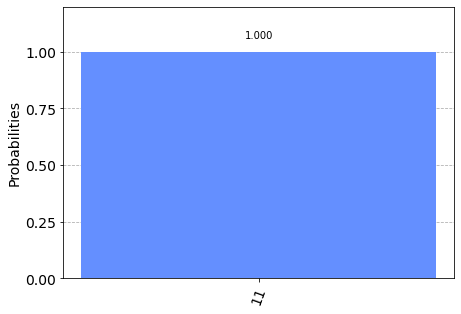

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
dj_circuit = dj_algorithm(n)
results = execute(dj_circuit, backend = backend, shots= shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [6]:
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)
%qiskit_job_watcher
dj_circuit = dj_algorithm(n)
job = execute(dj_circuit, backend = backend, shots = 1024, optimization_level = 3)

least busy backend:  ibmq_belem


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>